In [119]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [120]:
# load dataset
iris = datasets.load_iris()

In [121]:
# 為了視覺化分析結果，只選前兩個特徵（花萼長度，花萼寬度）
# label 也轉換成二元結果（不是0的都為1）
X = iris.data[:, :2]
y = (iris.target == 0) * 1

In [122]:
print("Total number of data: {}".format(X.shape[0]), ", Features number: {}".format(X.shape[1]))

Total number of data: 150 , Features number: 2


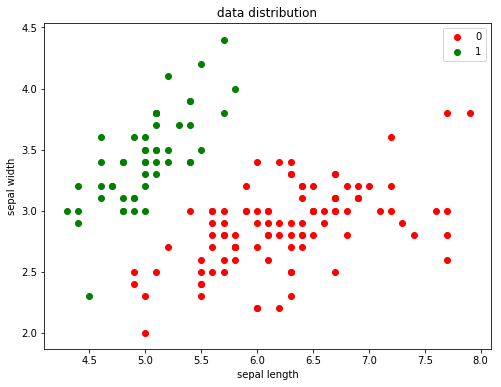

In [123]:
# 原始數據分佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c="red", marker="o", label="0")
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c="green", marker="o", label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title('data distribution')
plt.legend()
plt.show()

In [124]:
# 拆分資料集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training: {}".format(X_train.shape[0]), ", Test: {}".format(X_test.shape[0]))
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

Training: 120 , Test: 30


In [125]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

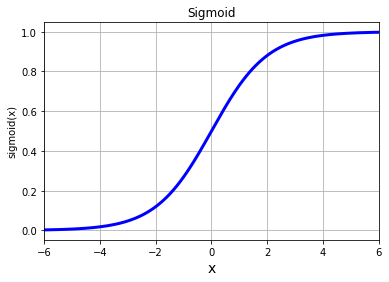

In [126]:
# print sigmoid
xmin, xmax, num = -6, 6, 200
x = np.linspace(xmin, xmax, num)
plt.plot(x, sigmoid(x), color = 'blue', linestyle = '-', linewidth = 3)
plt.xlabel('x', fontsize = 14)
plt.ylabel('sigmoid(x)')
plt.xlim(xmin,xmax)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.title('Sigmoid')
plt.grid('on')

In [127]:
# 代价函数（標量）
def loss(target, predict):
    return (-target * np.log(predict) - (1 - target) * np.log(1 - predict)).mean()

In [128]:
# 梯度下降
def gradient_descent(X, target, predict):
    return np.dot(X.T, (predict-target)) / target.shape[0]

In [129]:
# 計算截距
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [132]:
# 定義 hyperparameters
iter_num = 300000
learning_rate = 0.1
step = 10000

In [131]:
X_train = add_intercept(X_train)
theta = np.zeros(X_train.shape[1])
loss_record = []
for i in range(iter_num):
    z = np.dot(X_train, theta)
    predict = sigmoid(z)
    
    # calculate loss
    cur_loss = loss(y_train, predict)
    # calculate gradient
    gradient = gradient_descent(X_train, y_train, predict)
    # update theta
    theta -= learning_rate * gradient
    
    if i % step == 0:
        loss_record.append(cur_loss)
        print("step:{}, \tloss: {}".format(i, cur_loss))

step:0, 	loss: 0.6931471805599453
step:10000, 	loss: 0.03902487649029763
step:20000, 	loss: 0.0329412851064785
step:30000, 	loss: 0.029174775560755165
step:40000, 	loss: 0.026257846296235732
step:50000, 	loss: 0.023874821169157345
step:60000, 	loss: 0.021891921856381936
step:70000, 	loss: 0.020224784595230576
step:80000, 	loss: 0.018810410842918554
step:90000, 	loss: 0.01759949323516976
step:100000, 	loss: 0.01655319965745558
step:110000, 	loss: 0.01564100493589202
step:120000, 	loss: 0.014838922285276687
step:130000, 	loss: 0.014128048876504377
step:140000, 	loss: 0.013493405832839384
step:150000, 	loss: 0.012923037317738365
step:160000, 	loss: 0.012407322040987108
step:170000, 	loss: 0.011938450953449201
step:180000, 	loss: 0.011510031494210414
step:190000, 	loss: 0.011116786890520687
step:200000, 	loss: 0.010754326477512314
step:210000, 	loss: 0.010418969086687631
step:220000, 	loss: 0.010107606225374426
step:230000, 	loss: 0.009817595253763665
step:240000, 	loss: 0.0095466753259230

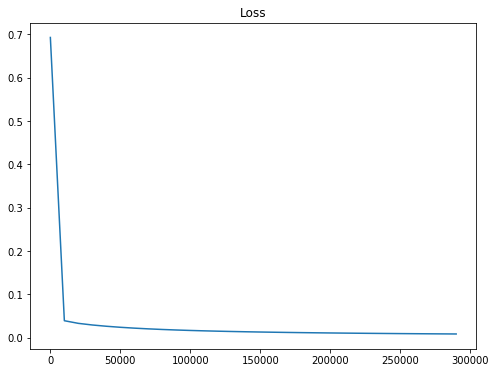

In [140]:
# print loss
plt.figure(figsize=(8, 6))
plt.plot(list(range(0, iter_num, step)), loss_record)
plt.title("Loss")
plt.show()

In [156]:
# predict
def predict_prob(X_test, theta):
    X_test = add_intercept(X_test)
    return sigmoid(np.dot(X_test, theta))
def predict(X_test, theta, threshold=0.5):
    return (predict_prob(X_test, theta) > threshold) * 1
def accuracy(target, predict):
    count = 0
    for i in range(len(target)):
        if target[i] == predict[i]:
            count += 1
    return (count / len(target)) * 100

In [157]:
predict = predict(X_test, theta)

In [159]:
# 計算準確率
accuracy = accuracy(y_test, predict)
print("Accuracy: {}%".format(accuracy))

Accuracy: 100.0%


In [160]:
# 繪製混淆矩陣
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[20,  0],
       [ 0, 10]])